In [2]:
import tensorflow as tf
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt



style_class = {0 : "Abstract_Expressionism",
1: "Action_painting",
2: "Analytical_Cubism",
3: "Art_Nouveau",
4: "Baroque",
5: "Color_Field_Painting",
6: "Contemporary_Realism",
7: "Cubism",
8: "Early_Renaissance",
9: "Expressionism",
10: "Fauvism",
11: "High_Renaissance",
12: "Impressionism",
13: "Mannerism_Late_Renaissance",
14: "Minimalism",
15: "Naive_Art_Primitivism",
16: "New_Realism",
17: "Northern_Renaissance",
18: "Pointillism",
19: "Pop_Art",
20: "Post_Impressionism",
21: "Realism",
22: "Rococo",
23: "Romanticism",
24: "Symbolism",
25: "Synthetic_Cubism",
26: "Ukiyo_e"}
model = tf.keras.models.load_model('first_cnn_artstyle_classification_model_25072024.h5')
def inference(path,model_chosen):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f)
        img = img.resize((224,224))
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize the image to [0, 1] range
    img_array = np.expand_dims(img_array, axis=0) 

    predictions = model_chosen.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    return predicted_class,predictions

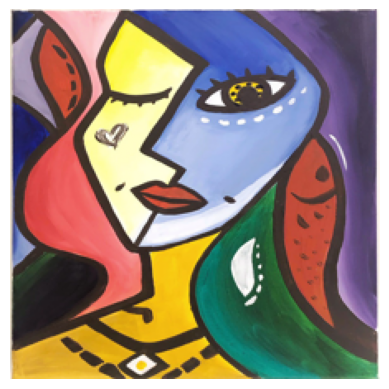

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Art Style: Fauvism | Probability =  58.99 %
('Fauvism', 58.99) ('Naive_Art_Primitivism', 31.13) ('Expressionism', 6.12) ('Cubism', 3.77)


In [6]:
path = "https://herohand.co/wp-content/uploads/2020/02/002-2.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f)
    img = img.resize((224,224))
    x = np.array(img) / 255.0
plt.imshow(x)
plt.axis('off')
plt.show()
predicted_class,predictions_for_each_class = inference(path, model)
print("Predicted Art Style:", style_class[predicted_class], "| Probability = ",round(predictions_for_each_class[0][predicted_class]*100,2),"%")

prediction = []
for i in range(27):
    prediction.append((style_class[i],round(predictions_for_each_class[0][i]*100,2)))
prediction.sort( key = lambda x : -x[1])

final_prediction = []
for artstyle,probability in prediction:
    if probability > 0:
        final_prediction.append((artstyle,probability))

print(*final_prediction)